# Work on the neurons

## Initialization

In [2]:
# Get the relevant dependencies 
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt
import heapq
from math import atan2,pi

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap


In [4]:
def load_event(file_name, plot_event=False):

    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules

In [5]:
def get_min_max_values(list):
    maximum = list[0]
    minimum = list[0]
    index_max = 0
    index_min = 0
    
    for i, n in enumerate(list):
        if n > maximum:
            maximum = n
            index_max = i

        if n < minimum:
            minimum = n
            index_min = i

    print('Maximum value and its index:', maximum,',',index_max)
    print('Minimum value and its index:',minimum,',',index_min)

## 1. Max_neurons and total hits information with all modules together


In [9]:
def get_min_max_values(list):
    maximum = list[0]
    minimum = list[0]
    index_max = 0
    index_min = 0
    
    for i, n in enumerate(list):
        if n > maximum:
            maximum = n
            index_max = i

        if n < minimum:
            minimum = n
            index_min = i

    print('Maximum value and its index:', maximum,',',index_max)
    print('Minimum value and its index:',minimum,',',index_min)

### Minibias dataset

In [209]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(995)]
random.seed(40)
random.shuffle(all_events)

nr_events = 995
event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_neurons_total = []
list_hits_total = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)
        
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)

In [170]:
print('Total hits')
get_min_max_values(list_hits_total)

print('Total neurons')
get_min_max_values(list_neurons_total)

print('Max neurons in one layer')
get_min_max_values(list_max_neurons)

Total hits
Maximum value and its index: 6786 , 716
Minimum value and its index: 51 , 259
Total neurons
Maximum value and its index: 877500 , 716
Minimum value and its index: 48 , 259
Max neurons in one layer
Maximum value and its index: 22436 , 716
Minimum value and its index: 4 , 259


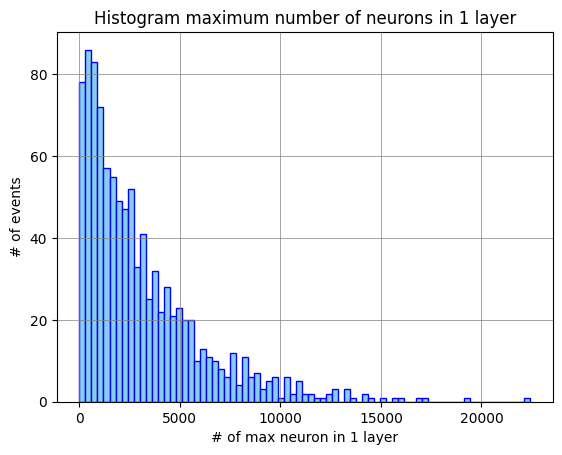

In [171]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neuron in 1 layer')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.savefig(f'neurons_analysis/Histogram_max_neurons_analysis_minibias.png')
plt.show()     

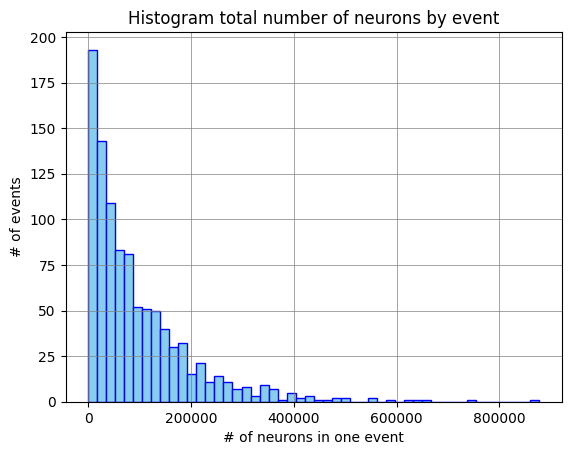

In [172]:
plt.hist(list_neurons_total,color = "skyblue", edgecolor='blue',bins=50)
plt.xlabel('# of neurons in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of neurons by event')
plt.savefig(f'neurons_analysis/Histogram_total_neurons_analysis_minibias.png')
plt.show()     

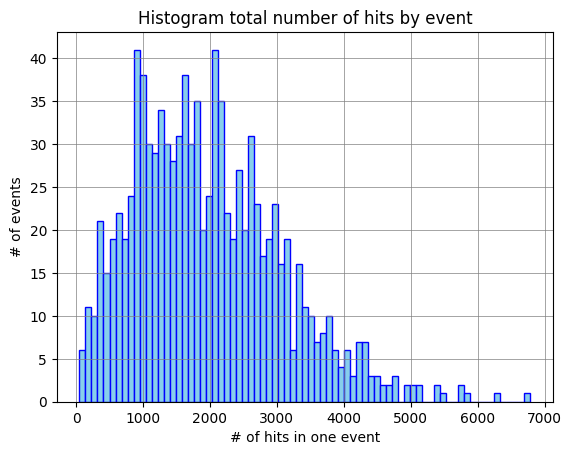

In [173]:
plt.hist(list_hits_total,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of hits in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of hits by event')
plt.savefig(f'neurons_analysis/Histogram_total_hits_analysis_minibias.png')
plt.show()     

### Bsphiphi dataset

In [174]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(1000)]
random.seed(40)
random.shuffle(all_events)

nr_events = 1000
event_file_name = "/datasets/bsphiphi/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_neurons_total = []
list_hits_total = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)
        
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)
        


In [175]:
print('Total hits')
get_min_max_values(list_hits_total)

print('Total neurons')
get_min_max_values(list_neurons_total)

print('Max neurons in one layer')
get_min_max_values(list_max_neurons)

Total hits
Maximum value and its index: 8666 , 602
Minimum value and its index: 336 , 317
Total neurons
Maximum value and its index: 1430500 , 602
Minimum value and its index: 2152 , 317
Max neurons in one layer
Maximum value and its index: 40145 , 602
Minimum value and its index: 90 , 366


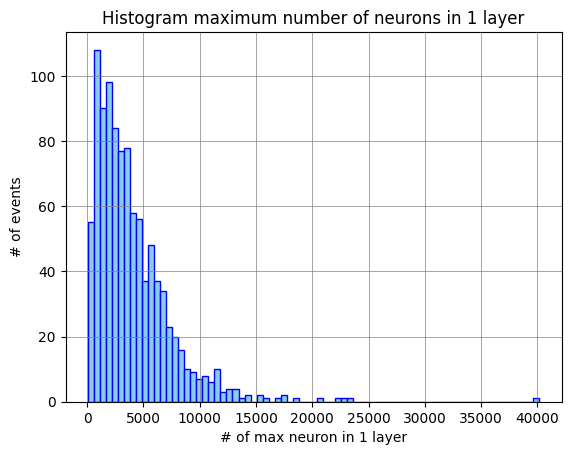

In [176]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neuron in 1 layer')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.savefig(f'neurons_analysis/Histogram_max_neurons_analysis_bsphiphi.png')
plt.show()    

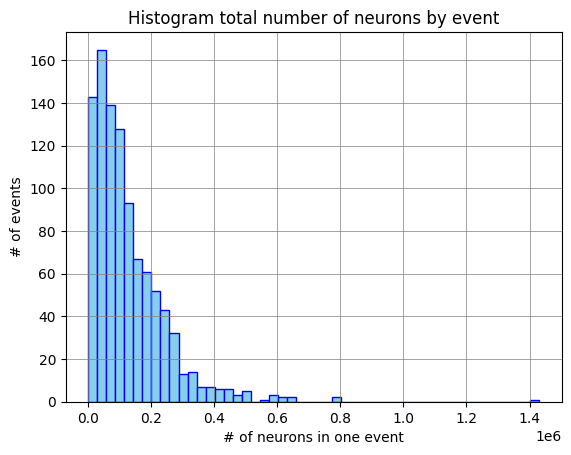

In [177]:
plt.hist(list_neurons_total,color = "skyblue", edgecolor='blue',bins=50)
plt.xlabel('# of neurons in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of neurons by event')
plt.savefig(f'neurons_analysis/Histogram_total_neurons_analysis_bsphiphi.png')
plt.show()     

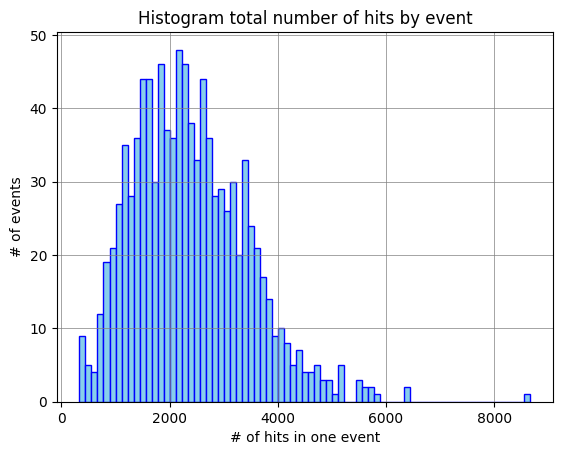

In [178]:
plt.hist(list_hits_total,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of hits in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of hits by event')
plt.savefig(f'neurons_analysis/Histogram_total_hits_analysis_bsphiphi.png')
plt.show()   

## 2. Max_neurons information with odd and even modules separated (like in the evaluate_events() fct)

In [7]:
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, (modules_even, modules_odd)

## a) Minibias

### 1. Computation

In [8]:
file_name = project_root + "/datasets/minibias/velo_event_"

all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list = []
while count < nr_events:
        i = all_events[j]
        j += 1
        
        size = os.path.getsize(file_name + str(i) + ".json")
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        max_neurons_list.append(max_neurons)
        count = count + 1


### 2. Quick Analysis

In [7]:
print("Number of events evaluated:", len(max_neurons_list))


Number of events evaluated: 995


Maximum value and its index: 26080 , 366
Minimum value and its index: 12 , 655
Average number of max neurons: 3603.873366834171
Percentage of events in the old MRP neurons limit:  55.879396984924625


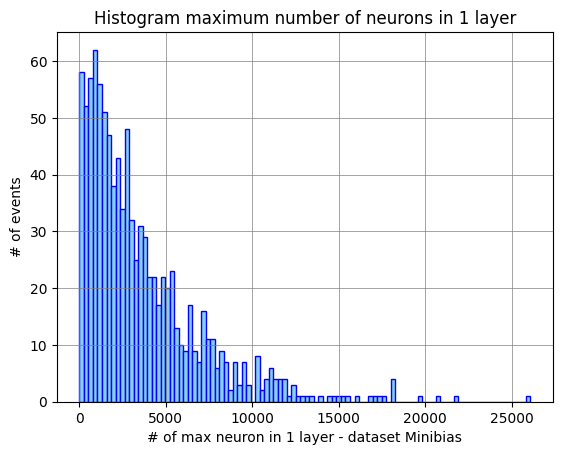

In [10]:
# Quick analysis
get_min_max_values(max_neurons_list)

mean = sum(max_neurons_list)/len(max_neurons_list)-1
print("Average number of max neurons:", mean)

counter=0
for value in max_neurons_list:
    if value > 2200:
        counter +=1

percentage_old_limit = (counter / len(max_neurons_list))*100
print("Percentage of events in the old MRP neurons limit: ", percentage_old_limit)

plt.hist(max_neurons_list,color = "skyblue", edgecolor='blue',bins=100)
plt.xlabel('# of max neuron in 1 layer - dataset Minibias')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.show()    

### 3. Deciles computation

In [9]:
#1. Define the deciles

deciles = np.percentile((max_neurons_list), np.arange(0, 100, 10))
deciles_int = [round(x) for x in deciles]

print(deciles_int)

[12, 492, 930, 1376, 1935, 2601, 3306, 4288, 5651, 7967]


In [10]:
#2. Function returning the event with the number of max neurons closest to the decile value

def closest_decile(lst, K):
    return min(enumerate(lst), key=lambda x: abs(x[1] - K))

In [11]:
#3. Create the list of selected event and their max neurons value
list_selected_events = []
for dec in deciles_int:
        close = closest_decile(max_neurons_list, dec)
        list_selected_events.append(close)
print(list_selected_events)


[(655, 12), (853, 484), (231, 930), (769, 1369), (293, 1935), (164, 2601), (1, 3306), (122, 4288), (837, 5644), (936, 7998)]


In [12]:
# 4.Formatting
df =pd.DataFrame(list_selected_events, columns=['Event ID', 'Event max neurons'])
df = df.assign(Deciles = deciles_int)
df = df.rename(columns={'Deciles': 'Decile max neurons'})
df.index.name = 'Decile'

print(df)

        Event ID  Event max neurons  Decile max neurons
Decile                                                 
0            655                 12                  12
1            853                484                 492
2            231                930                 930
3            769               1369                1376
4            293               1935                1935
5            164               2601                2601
6              1               3306                3306
7            122               4288                4288
8            837               5644                5651
9            936               7998                7967


In [15]:
print(max_neurons_list)

min_index = max_neurons_list.index(min(max_neurons_list))
print(min_index)


[1444, 3306, 30, 7832, 3306, 6715, 7872, 575, 625, 4968, 3480, 6640, 899, 1368, 1116, 121, 3024, 1088, 1156, 10400, 675, 110, 240, 2193, 7395, 840, 2650, 783, 1296, 4896, 598, 4830, 1849, 5476, 924, 121, 812, 480, 380, 324, 6480, 506, 2499, 1440, 12390, 3422, 1763, 1720, 3025, 1517, 3540, 1444, 2496, 1054, 10920, 1554, 5994, 1806, 2115, 2162, 4488, 529, 4225, 8280, 2254, 240, 7055, 5688, 5040, 10200, 224, 1505, 858, 1152, 361, 2304, 2484, 1224, 16899, 2162, 9797, 272, 210, 156, 3906, 7644, 3132, 6083, 1330, 6156, 1295, 3520, 1892, 4096, 5700, 3024, 378, 6083, 528, 3780, 1152, 3720, 4970, 2597, 1517, 3024, 2070, 1480, 7462, 2448, 1558, 4900, 992, 1760, 3906, 2530, 928, 1716, 1122, 7743, 2499, 195, 4288, 4620, 6622, 256, 3245, 3024, 11984, 462, 9310, 18060, 1120, 1332, 1216, 1517, 7052, 1287, 990, 3363, 2544, 2244, 992, 780, 1974, 7462, 1056, 7568, 36, 4692, 3538, 360, 5852, 5700, 4692, 2025, 3968, 676, 8463, 3306, 5396, 180, 441, 3021, 2601, 9024, 1600, 3304, 5040, 1978, 7395, 1634, 123

16
887


## b) Bsphiphi

### 1. Computation

In [45]:
file_name = project_root + "/datasets/bsphiphi/velo_event_"

all_events = [i for i in range(1000)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list = []
while count < nr_events:
        i = all_events[j]
        j += 1
        
        size = os.path.getsize(file_name + str(i) + ".json")
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        max_neurons_list.append(max_neurons)
        count = count + 1

### 2. Quick analysis

In [46]:
print("Number of events evaluated:", len(max_neurons_list))

Number of events evaluated: 1000


Maximum value and its index: 45787 , 897
Minimum value and its index: 121 , 290
Average number of max neurons: 4612.356
Percentage of events in the old MRP neurons limit:  72.1


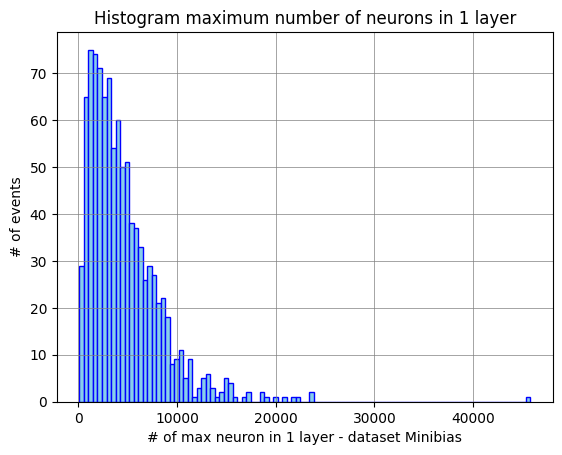

In [47]:
# Quick analysis
get_min_max_values(max_neurons_list)

mean = sum(max_neurons_list)/len(max_neurons_list)-1
print("Average number of max neurons:", mean)

counter=0
for value in max_neurons_list:
    if value > 2200:
        counter +=1

percentage_old_limit = (counter / len(max_neurons_list))*100
print("Percentage of events in the old MRP neurons limit: ", percentage_old_limit)

plt.hist(max_neurons_list,color = "skyblue", edgecolor='blue',bins=100)
plt.xlabel('# of max neuron in 1 layer - dataset Minibias')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.show()   

### 3. Deciles computation

In [48]:
#1. Define the deciles

deciles = np.percentile((max_neurons_list), np.arange(0, 100, 10))
deciles_int = [round(x) for x in deciles]

print(deciles_int)

[121, 1056, 1722, 2300, 2969, 3720, 4546, 5600, 7042, 8832]


In [49]:
#2. Function returning the event with the number of max neurons closest to the decile value

def closest_decile(lst, K):
    return min(enumerate(lst), key=lambda x: abs(x[1] - K))

In [50]:
#3. Create the list of selected event and their max neurons value
list_selected_events = []
for dec in deciles_int:
        close = closest_decile(max_neurons_list, dec)
        list_selected_events.append(close)
print(list_selected_events)


[(290, 121), (223, 1056), (296, 1722), (20, 2300), (13, 2968), (670, 3720), (92, 4544), (588, 5600), (864, 7040), (405, 8832)]


In [51]:
# 4.Formatting
df =pd.DataFrame(list_selected_events, columns=['Event ID', 'Event max neurons'])
df = df.assign(Deciles = deciles_int)
df = df.rename(columns={'Deciles': 'Decile max neurons'})
df.index.name = 'Decile'

print(df)

        Event ID  Event max neurons  Decile max neurons
Decile                                                 
0            290                121                 121
1            223               1056                1056
2            296               1722                1722
3             20               2300                2300
4             13               2968                2969
5            670               3720                3720
6             92               4544                4546
7            588               5600                5600
8            864               7040                7042
9            405               8832                8832


## Old functions (not used anymore)

In [ ]:
def events_deciles_section(max_neurons_list, nr_samples):

    deciles = np.percentile((max_neurons_list), np.arange(0, 100, nr_samples))
    deciles_round = [round(x) for x in deciles]

    events_selection_list = []
    for dec in deciles_int:
        for i, value in enumerate(max_neurons_list):
            if value == dec:
                events_selection_list.append(i)
                break

            elif value == (dec + 1):
                events_selection_list.append(i)
                break

            elif value == (dec - 1):
                events_selection_list.append(i)
                break

            elif value == (dec + 2):
                events_selection_list.append(i)
                break

            elif value == (dec - 2):
                events_selection_list.append(i)
                break
    
    return events_selection_list